<center><img src="https://matematica.usm.cl/wp-content/themes/dmatUSM/assets/img/logoDMAT2.png" title="Title text" /></center>
<hr style="height:2px;border:none"/>
<h1 align='center'> [MAT281] Proyecto final: Aplicaciones de las matemáticas a la ingeniería</h1>
<h2 align='center'> Conjunto de datos: "DARWIN" - Grupo 2</h2>
<hr style="height:2px;border:none"/>

<p style="text-align: center;">
    <img src="https://github.com/Darkrayyss/Proyecto-Final-MAT281/raw/307f0d0f14aefbff8de7698d0c645d680ced6994/Carpet%20for%20Test%201/images/Capy2.png" alt="Capybara trabajando" width="500" style="border: 7px solid black;">
    <br>
    <small>Título de la imagen: Capybara trabajando</small>
</p>

**Nombre del Conjunto de Datos:** DARWIN

**Objetivo del Conjunto de Datos:** El conjunto de datos DARWIN fue creado con el propósito de permitir a los investigadores mejorar las metodologías de aprendizaje automático para la predicción de la enfermedad de Alzheimer a través del análisis de la escritura a mano. La tarea principal es clasificar a los participantes en dos categorías: pacientes con enfermedad de Alzheimer (AD) y personas sanas (Saludable).

**Características Clave del Conjunto de Datos:**
- Número de Participantes: Un total de 174 participantes.
   - 89 pacientes con enfermedad de Alzheimer (AD).
   - 85 personas sanas (Saludable).
- Estructura del Archivo "DARWIN.csv":
   - 452 columnas en total.
   - La primera columna contiene identificadores de participantes.
   - La última columna indica la clase a la que pertenece cada participante ('P' para Paciente o 'H' para Saludable).
   - Las columnas intermedias almacenan características extraídas de 25 tareas específicas, con 18 características por tarea.

**Datos Faltantes:** No existen valores faltantes en el conjunto de datos.

**Referencias Relacionadas:**
- [1] Artículo titulado "An experimental protocol to support cognitive impairment diagnosis by using handwriting analysis" in Procedia Computer Science (2018).
- [2] Artículo titulado "Diagnosing Alzheimer’s disease from online handwriting: A novel dataset and performance benchmarking" in Engineering Applications of Artificial Intelligence (2022).

**Para más información acerca de las covariables, el experimento realizado para obtener las mediciones y los objetivos** pensandos para el trabajo incialmente, dirigase al árticulo *Diagnosing Alzheimer’s disease from on-line handwriting A novel dataset* [2].

# Manejo de datos

In [9]:
# Libraries for data handling and operations.
import pandas as pd
import numpy as np

# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import mutual_info_classif

# Visualization libraries.
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# URL of the CSV file
url = "https://raw.githubusercontent.com/Darkrayyss/Proyecto-Final-MAT281/55f75c4cf69c747fb155083ee56757f04078ad7c/Docs/darwin/data.csv"

# Import the CSV file into a DataFrame
df = pd.read_csv(url)

# Drop the Id
df.drop('ID', axis=1, inplace=True)

# Now, 'df' contains the data from the CSV file
df.head(5)

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,0.051836,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,P
1,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,0.039827,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,P
2,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,0.064220,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,P
3,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,0.090408,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,P
4,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,0.037528,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,P


In [11]:
df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Columns: 451 entries, air_time1 to class
dtypes: float64(300), int64(150), object(1)
memory usage: 613.2+ KB


Se decide eliminar la columna de "Id" dado que resulta redundante con el índice del dataframe.

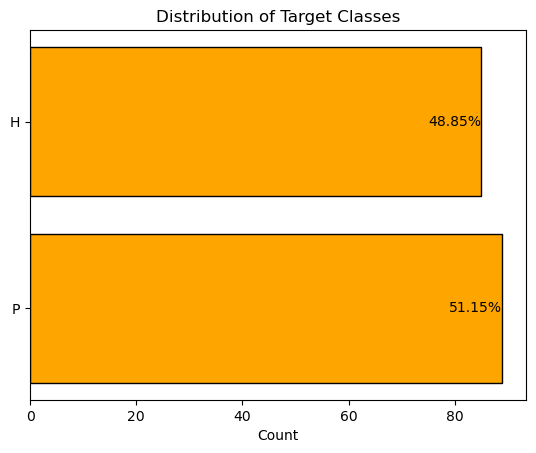

In [12]:
# Select the last row of the DataFrame
last_row = df.iloc[:, -1]

# Count the unique values in the last row (assuming it contains the target class)
unique_values = last_row.value_counts()

# Get the categories and values from the unique values
categories = unique_values.index
values = unique_values.values

# Calculate the total count
total_count = values.sum()

# Calculate the percentages
percentages = (values / total_count) * 100

# Create the horizontal histogram with specified colors, border, and percentages inside the bars
fig, ax = plt.subplots()
bars = plt.barh(categories, values, color='orange', edgecolor='black')
plt.xlabel('Count')
plt.title('Distribution of Target Classes')

# Add percentages inside the bars
for bar, percentage in zip(bars, percentages):
    ax.text(bar.get_width() - 10, bar.get_y() + bar.get_height()/2, f'{percentage:.2f}%', color='black', va='center')

plt.show()

Se observa que las clases se encuentran balanceadas respecto a las observaciones.

Se nota que la cantidad de covariables presentes puede significar un problema al momento de entrenar el modelo, ya sea por un posible overfitting o la complejidad computacional. Para esto, utilizaremos la información mutua para intentar reducir la cantidad de tareas involucradas.

Dado que el conjunto de datos cuenta con distintas tareas realizadas, resulta natural querer reducir esta gran magnitud de tareas hacia las más significativas para poder tener más control de las covariables a utilizar y permitir en la practica contar una cantidad de tareas más reducidas que permitan predecir si una persona padece la dicha enfermadad o no.

Se define la información mutua entre dos covariables como
$$
I(X,Y)=\sum_{X}\sum_{Y}p(x,y)\log\left(\frac{p(x,y)}{p(x)p(y)}\right)
$$

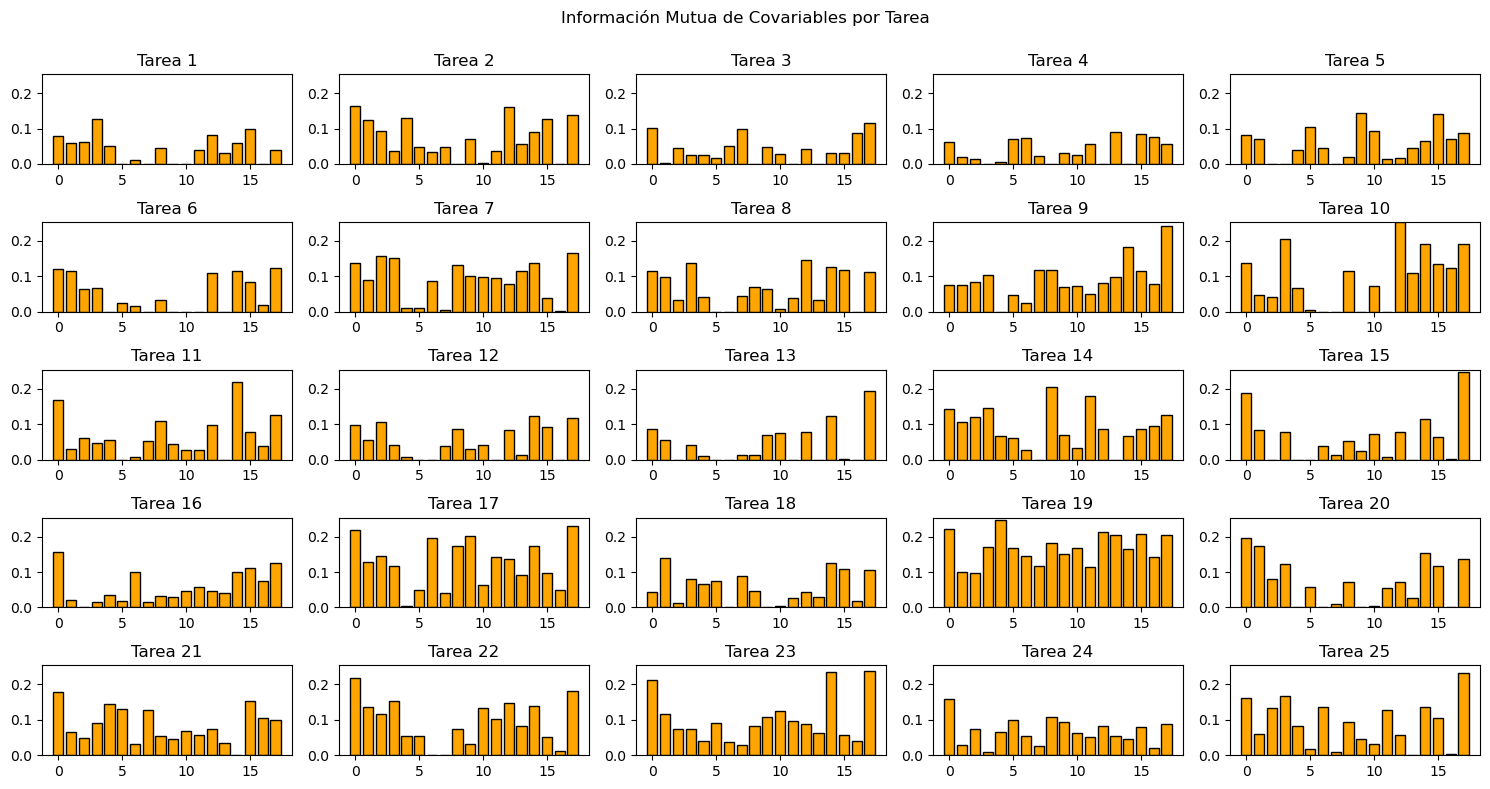

In [15]:
# 1. Calcular la información mutua de cada covariable con respecto a 'class'
X = df.drop(columns=['class'])
y = df['class']
mutual_info = mutual_info_classif(X, y)

# 2. Agrupar las covariables en conjuntos de 18 columnas (tareas)
num_columns_per_task = 18
grouped_mutual_info = [mutual_info[i:i+num_columns_per_task] for i in range(0, len(mutual_info), num_columns_per_task)]
group_names = [f'Tarea {i+1}' for i in range(len(grouped_mutual_info))]

# 3. Crear una cuadrícula de subgráficos
n = 5  # Número de columnas por fila
num_rows = len(grouped_mutual_info) // n  # Calcular el número de filas necesarias
if len(grouped_mutual_info) % n != 0:
    num_rows += 1

# Crear la cuadrícula de subgráficos
fig, axes = plt.subplots(num_rows, n, figsize=(15, 8))
fig.suptitle('Información Mutua de Covariables por Tarea')

# Establecer el rango del eje y de la información mutua
y_max = max(max(group) for group in grouped_mutual_info)
y_min = 0

# Graficar cada grupo de covariables
for i in range(len(grouped_mutual_info)):
    row = i // n
    col = i % n

    ax = axes[row, col]
    ax.bar(range(len(grouped_mutual_info[i])), grouped_mutual_info[i], color='orange', edgecolor='black')
    ax.set_title(group_names[i])
    ax.set_ylim(y_min, y_max)

# Ajustar los subgráficos y el espaciado
plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.show()

# Posibles aproximaciones para seguir trabajando.

**Según categoría**
Cada tarea tiene una categoría interna asociada: (M), (C), (G).

i) Considerar dicha categoría para trabajar.

ii) Ignorar la existencia de dichas categorías.

**Según tarea**

Es claro que cada 18 columnas se repiten las covariables pero para distintas tareas.

i) Considerar trabajar la cantidad de tareas por separado.

ii) Ignorar la separación por tareas.

**Disminución de Features**
Manejar 450 columnas es un trabajo que ta lvez no sea la mejor opción, entre las razones están: el costo computacional, el problema para interpretar los resultados, la dificultad de implementar el modelo real, etc.

i) Utilizar PCA de forma conveniente.

ii) Seleccionar features mediante test de Wald.

iii) Utilizar mutual information.

## Propuesta de trabajo

Teniendo en cuenta que cada tarea tiene asociada una categoría: dictation (M), Graphic (G), and Copy (C), se decide separar cada tarea según sus categorías y utilizar la tarea que tenga mayor información mutua en promedio con respecto a la variable objetivo. Para cada una de las tres tareas seleccionada se realizará su respectivo análisis de datos, selección de Features (en caso de ser necesario), selección de modelo, etc para entrenar un modelo respectivo a la tarea. Finalmente se juntarán los tres modelos mediante mayoría simple para predecir.

In [16]:
# Obtenido de tabla 1

task_letter_mapping = {
    1: 'M',
    2: 'G',
    3: 'G',
    4: 'G',
    5: 'G',
    6: 'C',
    7: 'C',
    8: 'C',
    9: 'C',
    10: 'C',
    11: 'C',
    12: 'C',
    13: 'C',
    14: 'M',
    15: 'C',
    16: 'C',
    17: 'C',
    18: 'M',
    19: 'C',
    20: 'M',
    21: 'G',
    22: 'C',
    23: 'M',
    24: 'G',
    25: 'C'
}


In [18]:
# Crear DataFrames separados para cada letra (M, G, C)
df_M = pd.DataFrame()
df_G = pd.DataFrame()
df_C = pd.DataFrame()

# Iterar sobre las tareas y agregar las columnas a los DataFrames adecuados
for task_number, task_letter in task_letter_mapping.items():
    column_start = (task_number - 1) * 18  # Calcular el índice de inicio de la tarea
    column_end = task_number * 18  # Calcular el índice de fin de la tarea

    # Agregar las columnas de la tarea al DataFrame correspondiente
    if task_letter == 'M':
        df_M = pd.concat([df_M, df.iloc[:, column_start:column_end]], axis=1)
    elif task_letter == 'G':
        df_G = pd.concat([df_G, df.iloc[:, column_start:column_end]], axis=1)
    elif task_letter == 'C':
        df_C = pd.concat([df_C, df.iloc[:, column_start:column_end]], axis=1)

Ahora df_M contiene las tareas respectivas a la categoría memory and dictation (M), el resto es análogo.